<a href="https://colab.research.google.com/github/denniesbor/phys513/blob/main/Phys513_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center; font-weight: bold;">Dennies Bor</h2>
<h3 style="text-align: center; font-weight: bold;">Applied Electrodynamics Theory</h3>

# Question 3.1

A sphertical shell is introduced at region c which is at $\frac{a+b}{2}$ with cumulative charge of $\frac{\mathbf{Q}}{2}$.

## **Finding E**

The following conditions holds:
- $\mathbf{E}$ at the inner shell of $a$ is Zero. And the total charge enclosed at the region is $\mathbf{-Q}$ and $\mathbf{E}$ between $a$ and $c$ is:
$$\mathbf{E_{a,b}} = k\frac{\mathbf{-Q}}{r^2}$$
- At $c$, the total charge is $-Q/2$ and $\mathbf{E}$ is
$$\mathbf{E_{c,b}} = k\frac{\mathbf{-Q}}{2r^2}$$
- And outside the outer shells, the netcharge enclosed is $\mathbf{-Q} + \frac{\mathbf{Q}}{2} + \mathbf{Q}$. $\mathbf{E}$ field at these region extending outwards is:
$$\mathbf{E_{b,\inf}} = k\frac{\mathbf{Q}}{2r^2}$$

And solving for potential difference

1. from a to c:

$$\psi(c) - \psi(a) = kQ \left( \frac{1}{c} - \frac{1}{a} \right) = kQ \left( \frac{2}{a+b} - \frac{1}{a} \right)$$

2. Potential difference from c to b:

$$\psi(b) - \psi(c) = kQ \left( \frac{1}{b} - \frac{1}{c} \right) = k \frac{Q}{2} \left( \frac{1}{b} - \frac{2}{a+b} \right)$$

From $a$ to $b$ would be a sum of the potential differences $a-c$ and $c-b$
$$\psi(a) - \psi(b) = (\psi(c) - \psi(a)) + (\psi(b) - \psi(c))$$

## **Charge Densities on Spherical Shells**

The charge densities $\sigma$ on the shells will be related to the total charge on the shell and the area of the shell.

### Inner Shell at $a$:

- Total charge enclosed: $-Q$

- The surface area of the inner shell is:
  $$A_a = 4\pi a^2$$

$\therefore$
  $$\sigma_a = \frac{-Q}{4\pi a^2}$$

### Shell at $c = \frac{a+b}{2}$:

- Total charge on this shell: $-Q/2$

- The surface area of this shell is:
  $$A_c = 4\pi c^2 = 4\pi \left(\frac{a+b}{2}\right)^2$$

- The charge density on this shell is:
  $$\sigma_c = \frac{-Q/2}{4\pi c^2} = \frac{-Q/2}{4\pi \left(\frac{a+b}{2}\right)^2} = \frac{-Q}{8\pi \left(\frac{a+b}{2}\right)^2}$$

  ### Shell at b

- The surface area of the outer shell is:
  $$A_b = 4\pi b^2$$

$\therefore$
  $$\sigma_b = \frac{Q}{8\pi b^2}$$

## **E ratios at different jumps**

## Electric Field Jumps at Shell Boundaries

1. **Ratio at $r = a$: $E_a / E_0$**
   $E_0 = 0$, $E_a = k\frac{-Q}{a^2}$
   $$\frac{E_a}{E_0} = \text{undefined (infinity)}$$

2. **Ratio at $r = c$: $E_c / E_a$**
   $E_a = k\frac{-Q}{c^2}$, $E_c = k\frac{-Q}{2c^2}$
   $$\frac{E_c}{E_a} = \frac{k\frac{Q}{2c^2}}{k\frac{Q}{c^2}} = \frac{1}{2}$$

3. **Ratio at $r = b$: $E_b / E_c$**
   $E_c = k\frac{-Q}{2b^2}$, $E_b = k\frac{Q}{2b^2}$
   $$\frac{E_b}{E_c} = \frac{k\frac{Q}{2b^2}}{k\frac{-Q}{2b^2}} = -1$$


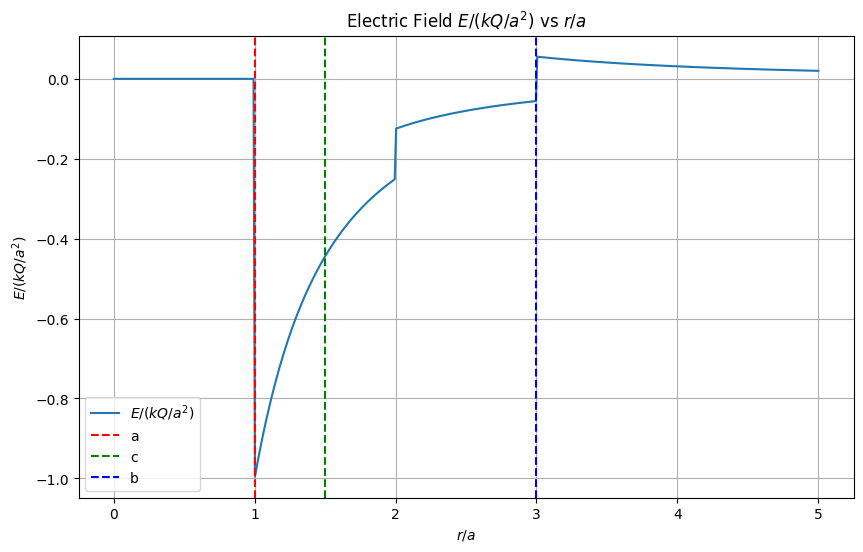

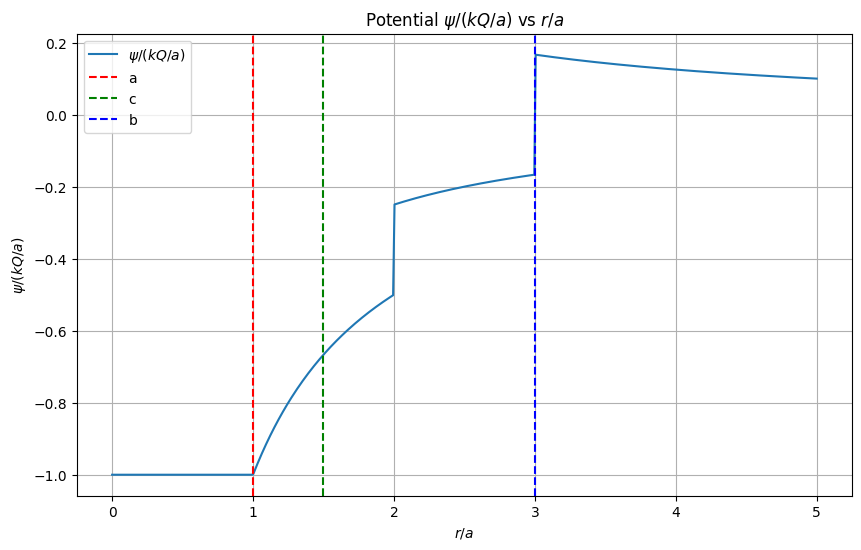

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Q = 10  # charge in arbitrary units
k = 1   # Coulomb constant
a = 1   # radius of the innermost shell
b = 3   # radius of the outermost shell
c = (a + b) / 2  # radius of the middle shell

# Defining the regions
r = np.linspace(0, 5, 500)

# Electric field in different regions
E = np.zeros_like(r)
# Region 1: r < a (inside the innermost shell)
E[r < a] = 0

# Region 2: a < r < c (between inner and middle shell)
E[(r >= a) & (r < c)] = k * (-Q) / r[(r >= a) & (r < c)]**2

# Region 3: c < r < b (between middle and outer shell)
E[(r >= c) & (r < b)] = k * (-Q/2) / r[(r >= c) & (r < b)]**2

# Region 4: r > b (outside the outer shell)
E[r >= b] = k * (Q/2) / r[r >= b]**2

# Electric potential in different regions
V = np.zeros_like(r)
# Region 1: r < a (inside the innermost shell)
V[r < a] = k * (-Q) / a  # constant potential inside

# Region 2: a < r < c (between inner and middle shell)
V[(r >= a) & (r < c)] = k * (-Q) / r[(r >= a) & (r < c)]

# Region 3: c < r < b (between middle and outer shell)
V[(r >= c) & (r < b)] = k * (-Q/2) / r[(r >= c) & (r < b)]

# Region 4: r > b (outside the outer shell)
V[r >= b] = k * (Q/2) / r[r >= b]


# Normalizing
E_normalized = E / (k * Q / a**2)
V_normalized = V / (k * Q / a)

# Plotting Electric Field
plt.figure(figsize=(10, 6))
plt.plot(r / a, E_normalized, label=r'$E / (kQ / a^2)$')
plt.axvline(x=1, color='r', linestyle='--', label='a')
plt.axvline(x=1.5, color='g', linestyle='--', label='c')
plt.axvline(x=3, color='b', linestyle='--', label='b')
plt.title('Electric Field $E/(kQ/a^2)$ vs $r/a$')
plt.xlabel('$r/a$')
plt.ylabel('$E/(kQ/a^2)$')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Potential
plt.figure(figsize=(10, 6))
plt.plot(r / a, V_normalized, label=r'$\psi / (kQ / a)$')
plt.axvline(x=1, color='r', linestyle='--', label='a')
plt.axvline(x=1.5, color='g', linestyle='--', label='c')
plt.axvline(x=3, color='b', linestyle='--', label='b')
plt.title('Potential $\psi / (kQ/a)$ vs $r/a$')
plt.xlabel('$r/a$')
plt.ylabel('$\psi / (kQ/a)$')
plt.grid(True)
plt.legend()
plt.show()


## Question 2: Capacitance of Cylindrical Shells

### 1. **Using Gauss's Law**

Given:
- Inner cylinder radius: $a$
- Outer cylinder radius: $b$
- Cylinder length: $L$
- Charge density on inner cylinder: $\sigma$ (C/m²)

The conditions are:
The charge on the outer shell is zero from Gauss law, and that the cylinder is infinitely long such E field is along the radius.

For regions between $0$ and $a$, $\mathbf{E}$ is 0.
Simplifying Gauss law, for regions between $a$ and $b$,.
$$\mathbf{E}(r){A} = \frac{\mathbf{Q_{enc}}}{\epsilon0}$$
which is
$$\mathbf{E}(r){2\pi rL} = \frac{\mathbf{Q{enc}}}{\epsilon_0}$$

Using charge density simplifies to:
$$E(r) = \frac{\sigma a}{\epsilon_0 r}$$

Potential difference:
$$V = -\int_a^b E(r) dr = \frac{\sigma a}{\epsilon_0} \ln\left(\frac{b}{a}\right)$$

Total charge:
$$Q = 2\pi a L \sigma$$

Capacitance:
$$C = \frac{Q}{V} = \frac{2\pi \epsilon_0 L}{\ln(b/a)}$$

### 2. **Using Laplace's Equation**

Solve $\nabla^2 V = 0$ in cylindrical coordinates:
$$\frac{1}{r} \frac{d}{dr} \left(r \frac{dV}{dr}\right) = 0$$

This simplifies to:

$$\frac{d}{dr} \left(r \frac{dV}{dr}\right) = 0$$

Integrating once:

$$r \frac{dV}{dr} = A$$

$$\frac{dV}{dr} = \frac{A}{r}$$

Integrating again:

$$V(r) = A \ln(r) + B$$

Boundary conditions:
- $V(a) = V_0$
- $V(b) = 0$

Solving for constants:
$$A = \frac{V_0}{\ln(a/b)}, \quad B = -V_0 \frac{\ln(b)}{\ln(a/b)}$$

Potential distribution:
$$V(r) = V_0 \frac{\ln(r/b)}{\ln(a/b)}$$

Electric field:
$$E(r) = -\frac{dV}{dr} = -\frac{V_0}{r \ln(a/b)}$$

Surface charge density on inner cylinder:
$$\sigma = \epsilon_0 E(a) = -\frac{\epsilon_0 V_0}{a \ln(a/b)}$$

Total charge:
$$Q = 2\pi a L \sigma = -\frac{2\pi \epsilon_0 L V_0}{\ln(a/b)}$$

Capacitance:
$$C = \frac{|Q|}{V_0} = \frac{2\pi \epsilon_0 L}{\ln(b/a)}$$


### Question 3.1
Laplace equation in 2D is given by:

$$\nabla^2\mathbf{V} = \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0$$

The second-order Taylor series approximation of this equation is:

$$V(i,j) \approx \frac{V(i+1,j) + V(i-1,j) + V(i,j+1) + V(i,j-1)}{4}$$

Given the boundary conditions:
- Top: 100
- Right: 20
- Bottom: 60
- Left: 80

Then the solutions to the individual potentials are:

For $\Phi_1$: $\Phi_1 = \frac{100 + \Phi_2 + 80 + \Phi_3}{4}$

For $\Phi_2$: $\Phi_2 = \frac{100 + 20 + \Phi_1 + \Phi_4}{4}$

For $\Phi_3$: $\Phi_3 = \frac{80 + \Phi_4 + 60 + \Phi_1}{4}$

For $\Phi_4$: $\Phi_4 = \frac{\Phi_3 + 20 + 60 + \Phi_2}{4}$


THese can be simplified as:

$$4\Phi_1 - \Phi_2 - \Phi_3 = 180$$
$$4\Phi_2 - \Phi_1 - \Phi_4 = 120$$
$$4\Phi_3 - \Phi_1 - \Phi_4 = 140$$
$$4\Phi_4 - \Phi_2 - \Phi_3 = 80$$


In [ ]:
# Set the initial condition
phi_1 = phi_2 = phi_3 = phi_4 = (100+20+60+80) / 4

# Coding for steps and printing the values
# The function updates the values
for i in range(10):
  phi_1 = (100 + phi_2 + 80 + phi_3) / 4
  phi_2 = (100 + 20 + phi_1 + phi_4) / 4
  phi_3 = (80 + phi_4 + 60 + phi_1) / 4
  phi_4 = (phi_3 + 20 + 60 + phi_2) / 4

  print(f"Step {i}: Phi1 = {phi_1}, Phi2 = {phi_2}, Phi3 = {phi_3}, Phi4 = {phi_4}")

Step 0: Phi1 = 77.5, Phi2 = 65.625, Phi3 = 70.625, Phi4 = 54.0625
Step 1: Phi1 = 79.0625, Phi2 = 63.28125, Phi3 = 68.28125, Phi4 = 52.890625
Step 2: Phi1 = 77.890625, Phi2 = 62.6953125, Phi3 = 67.6953125, Phi4 = 52.59765625
Step 3: Phi1 = 77.59765625, Phi2 = 62.548828125, Phi3 = 67.548828125, Phi4 = 52.5244140625
Step 4: Phi1 = 77.5244140625, Phi2 = 62.51220703125, Phi3 = 67.51220703125, Phi4 = 52.506103515625
Step 5: Phi1 = 77.506103515625, Phi2 = 62.5030517578125, Phi3 = 67.5030517578125, Phi4 = 52.50152587890625
Step 6: Phi1 = 77.50152587890625, Phi2 = 62.500762939453125, Phi3 = 67.50076293945312, Phi4 = 52.50038146972656
Step 7: Phi1 = 77.50038146972656, Phi2 = 62.50019073486328, Phi3 = 67.50019073486328, Phi4 = 52.50009536743164
Step 8: Phi1 = 77.50009536743164, Phi2 = 62.50004768371582, Phi3 = 67.50004768371582, Phi4 = 52.50002384185791
Step 9: Phi1 = 77.50002384185791, Phi2 = 62.500011920928955, Phi3 = 67.50001192092896, Phi4 = 52.50000596046448


## Question 3.3.2

Given the boundary conditions:
- Left side (x = 0): V = 80
- Right side (x = a): V = 0
- Top and bottom sides: V = 0

The potential only varies in the x-direction and is constant in the y-direction.

In this case, Laplace's equation reduces to:
$$\frac{d^2V}{dx^2} = 0$$
and its general solution is given by
$$V(x) = Ax + B$$

The newq boundary conditions are:
   At x = 0: V = 80, so B = 80
   At x = 3l: V = 0, so 0 = 3lA + 80

Solving for A
$$A = -\frac{80}{3l}$$

The potential at given location along the x is:
$$\phi = Ax + B$$
where:
$$A = -\frac{80}{3l}$$ and $$B = 80$$

Thus, the exact solution is:
$$\phi = -\frac{80x}{3l} + 80$$

In [ ]:
# In our boundary conditions, phi_1 and ph2 are equal alonmg the x axis
# Similarly for phi_2 and phi_4

# Phi_1, Phi_3 soln
l= 1 # Assume L is one
phi_1 =  round(-(80 * l) / (3*l) + 80, 2)
phi_3 =  round(-(80 * l) / (3*l) + 80,)

# Phi_2, Phi_4 soln
phi_2 =  round(-(80 * 2*l) / (3*l) + 80, 2)
phi_4 =  round(-(80 * 2*l) / (3*l) + 80, 2)

# Print the solutions
print(f"Exact solution: Phi_1 = {phi_1}: Phi_2 = {phi_2}: Phi_3 = {phi_3}: Phi_4 = {phi_4}")

Exact solution: Phi_1 = 53.33: Phi_2 = 26.67: Phi_3 = 53: Phi_4 = 26.67


In [ ]:
# Solution with numerical methods
# Will consider a 1D analysis since potential doesn't vary along the x
phi_1 = phi_2 = phi_3 = phi_4 = (80 + 0 + 0 + 0) / 4

for i in range(10):
  phi_1 = (phi_2 + 80) / 2
  phi_2 = (0 + phi_1) / 2
  phi_3 = (80 + phi_4) / 2
  phi_4 = (phi_3 + 0) / 2

  print(f"Step {i}: Phi1 = {phi_1}, Phi2 = {phi_2}, Phi3 = {phi_3}, Phi4 = {phi_4}")

Step 0: Phi1 = 50.0, Phi2 = 25.0, Phi3 = 50.0, Phi4 = 25.0
Step 1: Phi1 = 52.5, Phi2 = 26.25, Phi3 = 52.5, Phi4 = 26.25
Step 2: Phi1 = 53.125, Phi2 = 26.5625, Phi3 = 53.125, Phi4 = 26.5625
Step 3: Phi1 = 53.28125, Phi2 = 26.640625, Phi3 = 53.28125, Phi4 = 26.640625
Step 4: Phi1 = 53.3203125, Phi2 = 26.66015625, Phi3 = 53.3203125, Phi4 = 26.66015625
Step 5: Phi1 = 53.330078125, Phi2 = 26.6650390625, Phi3 = 53.330078125, Phi4 = 26.6650390625
Step 6: Phi1 = 53.33251953125, Phi2 = 26.666259765625, Phi3 = 53.33251953125, Phi4 = 26.666259765625
Step 7: Phi1 = 53.3331298828125, Phi2 = 26.66656494140625, Phi3 = 53.3331298828125, Phi4 = 26.66656494140625
Step 8: Phi1 = 53.333282470703125, Phi2 = 26.666641235351562, Phi3 = 53.333282470703125, Phi4 = 26.666641235351562
Step 9: Phi1 = 53.33332061767578, Phi2 = 26.66666030883789, Phi3 = 53.33332061767578, Phi4 = 26.66666030883789
